In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import numpy as np
import pandas as pd
import csv

### Navigating to the hg19 directory with:
cd /data/references/hg19

### ran bowtie command to align 2 mixed read files to human genome (input):
bowtie2 -p 4 --sensitive --no-unal -x /data/references/hg19/hg19 -1 /data/Lab6_data/mixed_reads1.fastq -2 /data/Lab6_data/mixed_reads2.fastq -S /home/5447259/Lab_6/output_human_alignment.sam --un-conc /home/5447259/Lab_6/unaligned_human.fastq

### (output):

#### 1285441 reads; of these:
##### 1285441 (100.00%) were paired; of these:
##### 1285094 (99.97%) aligned concordantly 0 times
##### 104 (0.01%) aligned concordantly exactly 1 time
#### 243 (0.02%) aligned concordantly >1 times
    ----
    1285094 pairs aligned concordantly 0 times; of these:
      228306 (17.77%) aligned discordantly 1 time
    ----
    1056788 pairs aligned 0 times concordantly or discordantly; of these:
      2113576 mates make up the pairs; of these:
        2057646 (97.35%) aligned 0 times
        12120 (0.57%) aligned exactly 1 time
        43810 (2.07%) aligned >1 times
### 19.96% overall alignment rate to humans

### ran bowtie command to resulting all confirmed non-human reads to Shewanella oneidensis genome 
#### (input):
bowtie2 -p 4 --sensitive --no-unal -x /data/references/shewanella_oneidensis_mr-1/shewanella_oneidensis_mr-1 -1 /home/5447259/Lab_6/unaligned_human.1.fastq -2 /home/5447259/Lab_6/unaligned_human.2.fastq -S /home/5447259/Lab_6/output_s_oneidensis.sam --un-conc /home/5447259/Lab_6/unaligned_s_oneidensis.fastq

#### (output):
#### 1285094 reads; of these:
  #### 1285094 (100.00%) were paired; of these:
   #### 1049137 (81.64%) aligned concordantly 0 times
    221306 (17.22%) aligned concordantly exactly 1 time
    14651 (1.14%) aligned concordantly >1 times
    ----
    1049137 pairs aligned concordantly 0 times; of these:
      290360 (27.68%) aligned discordantly 1 time
    ----
    758777 pairs aligned 0 times concordantly or discordantly; of these:
      1517554 mates make up the pairs; of these:
        1241202 (81.79%) aligned 0 times
        219915 (14.49%) aligned exactly 1 time
        56437 (3.72%) aligned >1 times
### 51.71% overall alignment rate to s_oneidensis

##### The reads did not cover the whole genome uniform. Some reads will be covered much less than average and some will have far more reads than the average. For the database, we use hg19 database and the input reads are FASTQ files. 

##### 1. When using the --un option, unaligned.fastq contains the unpaired reads that fail to align to the file at path. About 19% of sequencing library came from contaminating human DNA.

##### 2. Using the --un option, unaligned.fastq contains all the non aligned S.oneidensis reads. Using --sensitive the percentage of the filtered library that didn't align to the reference genome will probably increase because the percentage should be more accurate and catch many more mistmatches. 

### SAM to BAM 

samtools view -b /home/5447259/Lab_6/output_s_oneidensis.sam >/home/5447259/Lab_6/output_s_oneidensis.bam

### Sort BAM

samtools sort /home/5447259/Lab_6/output_s_oneidensis.bam > /home/5447259/Lab_6/output_s_oneidensis.sorted.bam

### Use Depth Operation to generate # of times reads aligned to coordinate of a genome

samtools depth -a /home/5447259/Lab_6/output_s_oneidensis.sorted.bam > /home/5447259/Lab_6/s_oneidensis.coverage

In [23]:
# https://www.genome.jp/kegg-bin/show_organism?org=son to find number of nucleotides in s.oneidensis genome
base = list(range(5131424))
# fill entire list with 0s to begin with
depth = [0] * 5131424
# parse coverage file with the separation being tabs
i = 0
with open('s_oneidensis.coverage') as file:
    read = csv.reader(file, delimiter= '\t')  
    for line in read:
        depth[i] = int(line[2])
        i = i + 1
sum_depth = sum(depth)
avg_depth = sum_depth / 5131424
print(avg_depth)

11.43810509519385


In [21]:
#finding average of each 10 base pair window
num_pieces = 1 + (5131424 // 10)
j = 0
mean_depth = [0] * num_pieces
for k in range(0, 5131424, 10):
    mean_depth[j] = np.mean(depth[j:j+10])
    j = j + 1
print(min(mean_depth))
print(max(mean_depth))


0.0
126.9


### Plotting Depth Frequencies

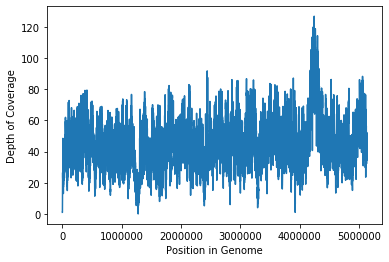

In [19]:
plt.xlabel("Position in Genome")
plt.ylabel("Depth of Coverage")
plt.plot(list(range(0, 5131424, 10)), mean_depth)

(array([4.06481e+06, 8.33274e+05, 1.92338e+05, 2.69630e+04, 8.92800e+03,
        3.92300e+03, 7.46000e+02, 4.10000e+01, 1.18000e+02, 2.83000e+02]),
 array([  0. ,  29.7,  59.4,  89.1, 118.8, 148.5, 178.2, 207.9, 237.6,
        267.3, 297. ]),
 <a list of 10 Patch objects>)

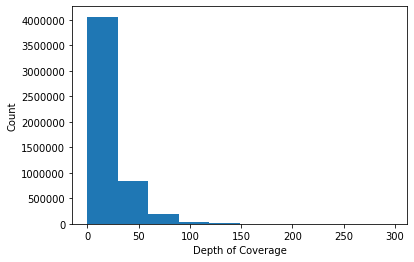

In [18]:
plt.xlabel("Depth of Coverage")
plt.ylabel("Count")
plt.hist(depth)

Min coverage is 0, Max coverage is 127, Mean coverage is 11 across all positions